## NewsAPI

In [2]:
import requests
from bs4 import BeautifulSoup
import pprint
import pandas as pd
import numpy as np

In [4]:
url = "https://newsapi.org/v2/everything"
api_key = "ee93b76bdcf94864a2bb399229216d88"

In [3]:
search_term = input("Enter a search keyword: ")

Enter a search keyword: covid


In [5]:
params = {
    'q': search_term,
    'pageSize': 25,
    'apiKey': api_key,
    'from': '2021-03-15'
}

response = requests.get(url, params = params)
response_json = response.json()

In [6]:
response_json

{'articles': [{'author': 'https://www.engadget.com/about/editors/igor-bonifacic',
   'content': 'Since the start of the coronavirus pandemic, DoorDash has expanded its delivery options to include everyday essentials and items from convenience stores. Now you can add COVID-19 testing kits to that… [+1449 chars]',
   'description': 'DoorDash is partnering with two digital health companies to allow people to order COVID-19 tests directly from its app.',
   'publishedAt': '2021-03-22T17:22:07Z',
   'source': {'id': 'engadget', 'name': 'Engadget'},
   'title': 'DoorDash now delivers COVID-19 testing kits',
   'url': 'https://www.engadget.com/doordash-covid-19-testing-kits-172207743.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-03/d0a932e0-8b31-11eb-aff7-254e04feac09'},
  {'author': 'Elizabeth Yuko',
   'content': 'We did it: we made it through the long COVID winter. And now that COVID spring is here, were starting to see some changes. Its getting a little warmer

In [7]:
response_json.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [8]:
response_json['totalResults']

424209

In [9]:
search_articles = response_json['articles']

In [10]:
def get_articles(file):
    article_results = []

    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]['url']
        article_dict['photo_url'] = file[i]['urlToImage']

        article_results.append(article_dict)
    return article_results

In [11]:
# creating a pandas dataframe
search_df = pd.DataFrame(get_articles(search_articles))

In [12]:
search_df.head()

,title,author,source,description,pub_date,url,photo_url
0,DoorDash now delivers COVID-19 testing kits,https://www.engadget.com/about/editors/igor-bo...,"{'id': 'engadget', 'name': 'Engadget'}","Since the start of the coronavirus pandemic, D...",2021-03-22T17:22:07Z,https://www.engadget.com/doordash-covid-19-tes...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,How to Keep Fire Ants Away From You and Your Home,Elizabeth Yuko,"{'id': None, 'name': 'Lifehacker.com'}",We did it: we made it through the long COVID w...,2021-03-20T13:00:00Z,https://lifehacker.com/how-to-keep-fire-ants-a...,https://i.kinja-img.com/gawker-media/image/upl...
2,"Uber, PayPal and Walgreens set up a Vaccine Ac...",https://www.engadget.com/about/editors/kris-holt,"{'id': 'engadget', 'name': 'Engadget'}",Uber\r\n has teamed up with PayPal\r\n and Wal...,2021-04-12T15:00:56Z,https://www.engadget.com/uber-paypal-walgreens...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,How to Find COVID Vaccination Sites in Apple Maps,David Murphy,"{'id': None, 'name': 'Lifehacker.com'}",While we cant help you find a vaccination appo...,2021-03-18T13:30:00Z,https://lifehacker.com/how-to-find-covid-vacci...,https://i.kinja-img.com/gawker-media/image/upl...
4,How Effective Is the COVID Vaccine on Kids?,"Beth Skwarecki on Vitals, shared by Beth Skwar...","{'id': None, 'name': 'Lifehacker.com'}",Pfizer and BioNTech announced today that they ...,2021-03-31T18:45:00Z,https://vitals.lifehacker.com/how-effective-is...,https://i.kinja-img.com/gawker-media/image/upl...


In [13]:
# formatting source
def source_getter(df):
  source = []
  for source_dict in df['source']:
    source.append(source_dict['name'])
  df['source'] = source

In [14]:
source_getter(search_df)

In [15]:
search_df.shape

(25, 7)

In [16]:
search_df

,title,author,source,description,pub_date,url,photo_url
0,DoorDash now delivers COVID-19 testing kits,https://www.engadget.com/about/editors/igor-bo...,Engadget,"Since the start of the coronavirus pandemic, D...",2021-03-22T17:22:07Z,https://www.engadget.com/doordash-covid-19-tes...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,How to Keep Fire Ants Away From You and Your Home,Elizabeth Yuko,Lifehacker.com,We did it: we made it through the long COVID w...,2021-03-20T13:00:00Z,https://lifehacker.com/how-to-keep-fire-ants-a...,https://i.kinja-img.com/gawker-media/image/upl...
2,"Uber, PayPal and Walgreens set up a Vaccine Ac...",https://www.engadget.com/about/editors/kris-holt,Engadget,Uber\r\n has teamed up with PayPal\r\n and Wal...,2021-04-12T15:00:56Z,https://www.engadget.com/uber-paypal-walgreens...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,How to Find COVID Vaccination Sites in Apple Maps,David Murphy,Lifehacker.com,While we cant help you find a vaccination appo...,2021-03-18T13:30:00Z,https://lifehacker.com/how-to-find-covid-vacci...,https://i.kinja-img.com/gawker-media/image/upl...
4,How Effective Is the COVID Vaccine on Kids?,"Beth Skwarecki on Vitals, shared by Beth Skwar...",Lifehacker.com,Pfizer and BioNTech announced today that they ...,2021-03-31T18:45:00Z,https://vitals.lifehacker.com/how-effective-is...,https://i.kinja-img.com/gawker-media/image/upl...
5,Apple Maps now shows COVID-19 vaccination loca...,Kait Sanchez,The Verge,Facebook and Google are also expanding vaccina...,2021-03-16T21:16:08Z,https://www.theverge.com/2021/3/16/22334609/ap...,https://cdn.vox-cdn.com/thumbor/Dxk2Ku0txURewD...
6,Facebook freezes Venezuela president's page ov...,https://www.engadget.com/about/editors/jon-fingas,Engadget,Facebook is holding more political leaders acc...,2021-03-27T16:05:17Z,https://www.engadget.com/facebook-freezes-vene...,https://s.yimg.com/os/creatr-uploaded-images/2...
7,Now Apple Maps can help you find COVID-19 vacc...,https://www.engadget.com/about/editors/igor-bo...,Engadget,"Starting today, people in the US can use Apple...",2021-03-16T23:06:38Z,https://www.engadget.com/apple-maps-covid-19-l...,https://s.yimg.com/os/creatr-uploaded-images/2...
8,The airline industry will release a COVID-19 p...,https://www.engadget.com/about/editors/igor-bo...,Engadget,After successfully trialing it on an internati...,2021-03-31T18:35:50Z,https://www.engadget.com/iata-travel-pass-1835...,https://s.yimg.com/os/creatr-uploaded-images/2...
9,Apple Maps adds information on COVID-19 measur...,https://www.engadget.com/about/editors/igor-bo...,Engadget,Apple is adding a small but handy feature for ...,2021-03-31T02:08:03Z,https://www.engadget.com/apple-maps-travel-gui...,https://s.yimg.com/os/creatr-uploaded-images/2...


## Building a word cloud

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
text_combined = ''
  
for i in response_json['articles']:
      
    if i['description'] != None:
        text_combined += i['description'] + ' '
          
wordcount={}
for word in text_combined.split():
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
  
for k,v, in sorted(wordcount.items(),
                   key=lambda words: words[1], 
                   reverse = True):
    print(k,v)

the 28
to 23
a 14
and 14
COVID-19 13
of 12
it 10
is 9
that 7
can 7
in 7
vaccination 6
vaccine 6
for 6
with 5
COVID 5
are 5
have 5
about 5
The 5
on 5
health 4
from 4
its 4
Apple 4
has 4
who 4
people 3
We 3
help 3
you 3
how 3
or 3
at 3
they 3
be 3
US 3
but 3
new 3
first 3
digital 2
we 2
spring 2
starting 2
some 2
getting 2
little 2
sites. 2
find 2
given 2
into 2
today 2
their 2
If 2
added 2
locations 2
Facebook 2
Google 2
travelers 2
verified 2
those 2
travel 2
In 2
without 2
Covid 2
go 2
track 2
gave 2
could 2
released 2
been 2
plan 2
state 2
levels 2
experience 2
DoorDash 1
partnering 1
two 1
companies 1
allow 1
order 1
tests 1
directly 1
app. 1
did 1
it: 1
made 1
through 1
long 1
winter. 1
And 1
now 1
here, 1
we’re 1
see 1
changes. 1
It’s 1
warmer 1
outside, 1
flowers 1
bloom, 1
fire 1
ant 1
season 1
upon 1
us. 1
Along 1
fall, 1
spring… 1
Anyone 1
donate 1
cover 1
cost 1
rides 1
While 1
can’t 1
appointment—good 1
luck, 1
terribly 1
we’ve 1
orchestrated 1
process 1
turned 1
kind 1
free

In [20]:
# initializing bad_chars_list 
stop_words = ["a", "the" , "of", "in", "to", "and", "on", "de", "with", 
             "by", "at", "dans", "ont", "été", "les", "des", "au", "et", 
             "après", "avec", "qui", "par", "leurs", "ils", "a", "pour", 
             "les", "on", "as", "france", "eux", "où", "son", "le", "la",
             "en", "with", "is", "has", "for", "that", "an", "but", "be", 
             "are", "du", "it", "à", "had", "ist", "Der", "um", "zu", "den", 
             "der", "-", "und", "für", "Die", "von", "als",
             "sich", "nicht", "nach", "auch"  ]

In [21]:
r = text_combined.replace('\s+',' ').replace(',', ' ').replace('.',' ')
words = r.split()
rst = [word for word in words if 
       ( word.lower() not in stop_words 
        and len(word) > 3) ]
  
rst = ' '.join(rst)
   
wordcount={}
  
for word in rst.split():
      
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
   
for k,v, in sorted(wordcount.items(),
                   key=lambda words: words[1],
                   reverse = True):
    print(k,v)

COVID-19 13
vaccine 7
vaccination 6
COVID 5
have 5
about 5
health 4
people 4
from 4
Apple 4
help 3
sites 3
today 3
they 3
effective 3
first 3
digital 2
tests 2
spring 2
here 2
starting 2
some 2
getting 2
little 2
find 2
given 2
into 2
their 2
added 2
locations 2
Maps 2
Facebook 2
Google 2
misinformation 2
travelers 2
verified 2
those 2
travel 2
pandemic 2
without 2
Covid 2
track 2
gave 2
could 2
released 2
data 2
been 2
plan 2
state 2
levels 2
More 2
experience 2
DoorDash 1
partnering 1
companies 1
allow 1
order 1
directly 1
made 1
through 1
long 1
winter 1
we’re 1
changes 1
It’s 1
warmer 1
outside 1
flowers 1
bloom 1
fire 1
season 1
upon 1
Along 1
fall 1
spring… 1
Anyone 1
donate 1
cover 1
cost 1
rides 1
While 1
can’t 1
appointment—good 1
luck 1
terribly 1
we’ve 1
orchestrated 1
process 1
turned 1
kind 1
free-for-all 1
reminiscent 1
buying 1
concert 1
tickets 1
shoes 1
GeForce 1
3080 1
cards—we 1
least 1
give 1
useful… 1
Pfizer 1
BioNTech 1
announced 1
completed 1
phase 1
trial 1
chil

## plotting the word cloud

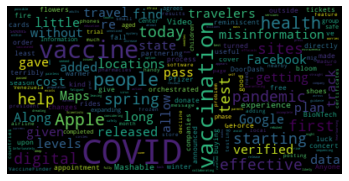

In [22]:
word = WordCloud(max_font_size = 40).generate(rst)
plt.figure()
plt.imshow(word, interpolation ="bilinear")
plt.axis("off")
plt.show()

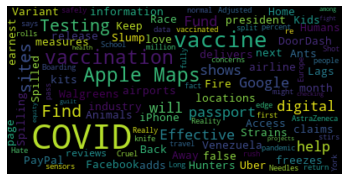

In [23]:
title_combined = ''
  
for i in response_json['articles']:
    title_combined += i['title'] + ' '
      
titles = title_combined.replace('\s+',' ').replace(',',' ').replace('.',' ')
words_t = titles.split()
result = [word for word in words_t if
          ( word.lower() not in stop_words and
           len(word) > 3) ]
  
result = ' '.join(result)
   
wordcount={}
  
for word in result.split():
      
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
  
word = WordCloud(max_font_size=40).generate(result)
plt.figure()
plt.imshow(word, interpolation="bilinear")
plt.axis("off")
plt.show()

# Newspaper Article summarizer

In [24]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 4.9MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 7.4MB 7.2MB/s 
     |████████████████████████████████| 92kB 5.6MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=7b99f9d298d1f15674bd510dda5b9bb237010995b28022351f88656fd879c8da
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=225256c5430a82f991de4f45662a4cd6954381a9d352842e98ba0fa4cfc07a8a
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=87d646888a70bb45366f283370b05eabbc34e8eacf2253b33d313ae011a2d2a0
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c75

In [25]:
from newspaper import Article

# url = "https://timesofindia.indiatimes.com/india/were-a-data-science-driven-body-that-deals-in-facts-evidence-says-barc/articleshow/78598046.cms"
url = "https://vineethm.hashnode.dev/iterative-recursion"
article = Article(url, language = "en")

In [26]:
# using multi-threading
import threading
import os

In [27]:
# to download the article
def article_download(article):
    article.download()

In [28]:
# parse the article
def article_parse(article):
    article.parse()

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
# perform natural language processing ie..nlp
def article_nlp(article):
    article.nlp()

In [63]:
# extract title
def article_title(article):
    return article.title

In [64]:
# extract text
def article_text(article):
    return article.text

In [65]:
# extract summary
def article_summary(article):
    return article.summary

In [81]:
# extract keywords
def article_keywords(article):
    return article.keywords

In [67]:
# header top image
def article_top(article):
    return article.top_image

In [83]:
# serial implementation
import time

functions = [article_download, article_parse, article_nlp, article_title, article_text,
            article_summary, article_keywords]

# sequential execution
start_time = time.time()
for i in functions:
    i(article)
end_time = time.time()
print("Time taken for serial implementation: ", end_time - start_time)

Time taken for serial implementation:  0.7208518981933594


In [38]:
!pip install pymp-pypi

In [39]:
# checking for the number of cores
import pymp

with pymp.Parallel() as p:
    p.print(p.num_threads, p.thread_num)

2 0
2 1


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
# parallel implementation
from threading import Thread
from joblib import Parallel, delayed

total_threads = 7
threads = [None] * total_threads

start_time = time.time()
# serial calling of first 2 functions

for i in range(total_threads):
    print("spawning thread")
    threads[i] = Thread(target = functions[i], args = (article,))
    threads[i].start()

end_time = time.time()
print("Time taken for parallel implementation: ", end_time - start_time)

spawning thread
spawning thread
spawning thread
spawning thread
spawning thread
spawning thread
spawning thread
Time taken for parallel implementation:  0.03056192398071289


Links for multi-threaded download: https://newspaper.readthedocs.io/en/latest/user_guide/advanced.html#multi-threading-article-downloads